# Programming Exercise 1: Linear Regression

In [2]:
import numpy as np
import pandas as pd
#import matplotlib
import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d as plt3d

## Simple Octave/MATLAB function with Numpy

### 5 x 5 identity matrix

In [756]:
np.eye(3)
# np.identity(3)

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

## Linear regression with one variable

### Load Data

Read comma separated data wit pd.read_csv or np.loadtxt

In [3]:
df = pd.read_csv("ex1data1.txt",delimiter=',', header=None)
X = df[0]
y = df[1] # <class 'pandas.core.series.Series'>
m = len(y) # number of training examples


# or load data with np.loadtxt
# data = np.loadtxt('ex1data1.txt',delimiter=',')
# print(type(data))
# x = data[:,0]
# y = data[:,1]
# type(x) # <class 'numpy.ndarray'>

(97,)

### Describe Data

In [758]:
df.describe()

,0,1
count,97.000000,97.000000
mean,8.159800,5.839135
std,3.869884,5.510262
min,5.026900,-2.680700
25%,5.707700,1.986900
50%,6.589400,4.562300
75%,8.578100,7.046700
max,22.203000,24.147000


In [759]:
df.head()

,0,1
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [760]:
df.tail()

,0,1
92,5.8707,7.20290
93,5.3054,1.98690
94,8.2934,0.14454
95,13.3940,9.05510
96,5.4369,0.61705


In [761]:
print("Number of training examples: ", m)
head = zip(X.head(), y.head())
for (xi, yi) in head:
    print(xi, yi)

Number of training examples:  97
6.1101 17.592
5.5277 9.1302
8.5186 13.662
7.0032 11.854000000000001
5.8598 6.8233


### Plotting the Data

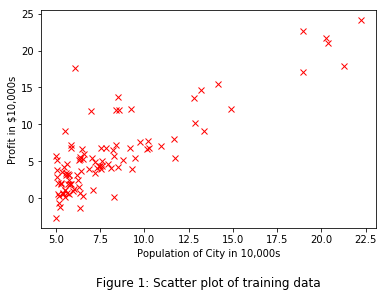

In [762]:
plt.plot(X, y, 'rx')
# y=-0.3 to set the title position
plt.title("Figure 1: Scatter plot of training data", y=-0.3)
# Set the x−axis label
plt.xlabel('Population of City in 10,000s')
# Set the y−axis label 
plt.ylabel('Profit in $10,000s')

plt.show()

### Gradient Descent

Initialization

In [763]:
X = np.column_stack((np.ones(m), X))
print(X.shape)
X[:5]

(97, 2)


array([[1.    , 6.1101],
       [1.    , 5.5277],
       [1.    , 8.5186],
       [1.    , 7.0032],
       [1.    , 5.8598]])

In [764]:
theta = np.zeros(2); # initialize fitting parameters
iterations = 1500;
alpha = 0.01;

In [765]:
def compute_cost(X, y, theta):
    """
    Compute cost for linear regression
    J = compute_cost(X, y, theta) computes the cost of using theta as the
    parameter for linear regression to fit the data points in X and y
    """
    # h = X * theta
    # J = sum((h - y) .^ 2)/(2*m)
    
    # predictions of hypothesis on examples
    predictions = np.dot(X, theta)
    # squared errors, flatten(): shape(97, 1) -> shape(97,)
    sqrErrors   = (predictions - y) ** 2 
    J = sqrErrors.sum() / (2 * m)
    return J

In [766]:
# compute and display initial cost
J = compute_cost(X, y, theta)
# You should expect to see a cost of 32.07
print(J)

32.072733877455676


In [767]:
# further testing of the cost function
J = compute_cost(X, y, np.array([-1 , 2]))
# Expected cost value (approx) 54.24

In [768]:
J

54.24245508201238

In [769]:
def gradient_descent(X, y, theta, alpha, num_iters):
    """
    Performs gradient descent to learn theta
    theta = gradient_descent(X, y, theta, alpha, num_iters) updates theta by
    taking num_iters gradient steps with learning rate alpha
    """
    # Initialize some useful values
    m = len(y) # number of training examples
    J_history = np.zeros(num_iters)
    
    for i in range(num_iters):
        # Instructions: Perform a single gradient step on the parameter vector theta.
        # Hint: While debugging, it can be useful to print out the values
        # of the cost function (compute_cost) and gradient here.
        h = X.dot(theta)
        errors = h - y
        delta = X.T.dot(errors)
        theta -= (alpha / m) * delta
        # Save the cost J in every iteration
        J_history[i] = compute_cost(X, y, theta);
    
    return (theta, J_history)

In [770]:
# Run gradient descent
(theta, J_history)  = gradient_descent(X, y, theta, alpha, iterations)
# Expected theta values (approx): [-3.6303, 1.1664]
print(theta)

[-3.63029144  1.16636235]


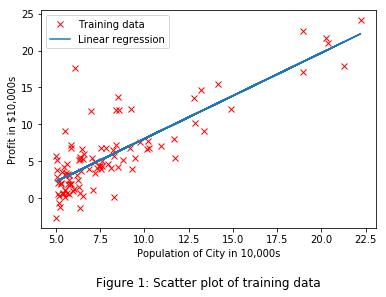

In [771]:
# Plot training data
plt.plot(X[:,1], y, 'rx', label='Training data')
# Plot linear regression
plt.plot(X[:,1], X.dot(theta), '-', label="Linear regression")

# y=-0.3 to set the title position
plt.title("Figure 1: Scatter plot of training data", y=-0.3)
# Set the x−axis label
plt.xlabel('Population of City in 10,000s')
# Set the y−axis label 
plt.ylabel('Profit in $10,000s')

plt.legend()
plt.show()

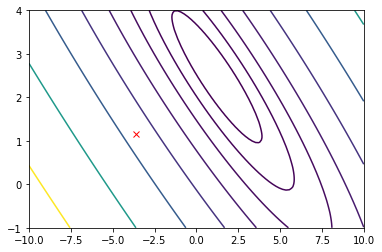

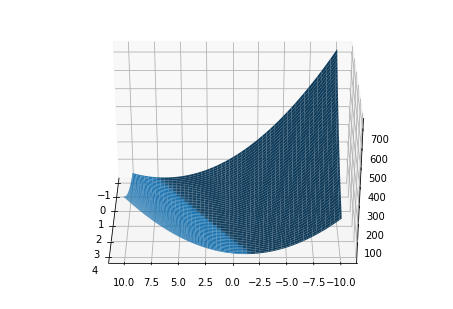

In [787]:
theta0_vals = np.linspace(10, -10, 100)
theta1_vals = np.linspace(-1, 4, 100)
J_vals = np.zeros((theta0_vals.size, theta1_vals.size))

for i in range(theta0_vals.size):
    for j in range(theta1_vals.size):
        t = np.array([theta0_vals[i], theta1_vals[j]])
        J_vals[i, j] = compute_cost(X, y, t)
plt.contour(theta0_vals, theta1_vals, J_vals, levels=np.logspace(-2, 3, 20))
plt.plot(theta[0], theta[1], 'rx')

fig = plt.figure()
ax = plt3d.Axes3D(fig)
t0, t1 = np.meshgrid(theta0_vals, theta1_vals)
ax.plot_surface(t0, t1, J_vals)
#plt.gca().invert_xaxis()
#ax.view_init(azim=180)

plt.show()